<a href="https://colab.research.google.com/github/desstroyy/Water-Sample-Analysis/blob/main/WaterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#IMPORTING AND PREPROCESSING
data = pd.read_csv("water_dataX.csv", encoding = 'unicode_escape')
data=data.drop(['STATION CODE','LOCATIONS','STATE','year'],axis=1)
data = data.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)
df.fillna(df.mean(), inplace=True)

col=['Temp','D.O. (mg/l)','PH', 'CONDUCTIVITY (�mhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)']
df = pd.DataFrame(data, columns=col)
df2=df.copy()

In [ ]:
df.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (�mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)
0,30.6,6.7,7.5,203.0,6.940049,0.1,11.0,27.0
1,29.8,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0
2,29.5,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0
3,29.7,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0
4,29.5,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0


In [ ]:
#data = pd.read_csv("water_dataX.csv", encoding = 'unicode_escape')
#data=data.drop(['STATION CODE','LOCATIONS','STATE','year'],axis=1)
#col=['Temp','D.O. (mg/l)','PH', 'CONDUCTIVITY (�mhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)']
#df3 = pd.DataFrame(data, columns=col)
#df3.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (�mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)
0,30.6,6.7,7.5,NaN,NAN,0.1,11,NaN
1,29.8,5.7,7.2,NaN,2,0.2,4953,NaN
2,29.5,6.3,6.9,NaN,1.7,0.1,3243,NaN
3,29.7,5.8,6.9,NaN,3.8,0.5,5382,NaN
4,29.5,5.8,7.3,NaN,1.9,0.4,3428,NaN


In [ ]:
print(df)

           Temp  D.O. (mg/l)   PH  CONDUCTIVITY (�mhos/cm)  B.O.D. (mg/l)  \
0     30.600000          6.7  7.5                    203.0       6.940049   
1     29.800000          5.7  7.2                    189.0       2.000000   
2     29.500000          6.3  6.9                    179.0       1.700000   
3     29.700000          5.8  6.9                     64.0       3.800000   
4     29.500000          5.8  7.3                     83.0       1.900000   
...         ...          ...  ...                      ...            ...   
1986  26.209814          7.9  7.2                    738.0       2.700000   
1987  29.000000          7.5  6.3                    585.0       2.600000   
1988  28.000000          7.6  6.2                     98.0       1.200000   
1989  28.000000          7.7  6.5                     91.0       1.300000   
1990  29.000000          7.6  5.7                    110.0       1.100000   

      NITRATENAN N+ NITRITENANN (mg/l)  FECAL COLIFORM (MPN/100ml)  \
0    

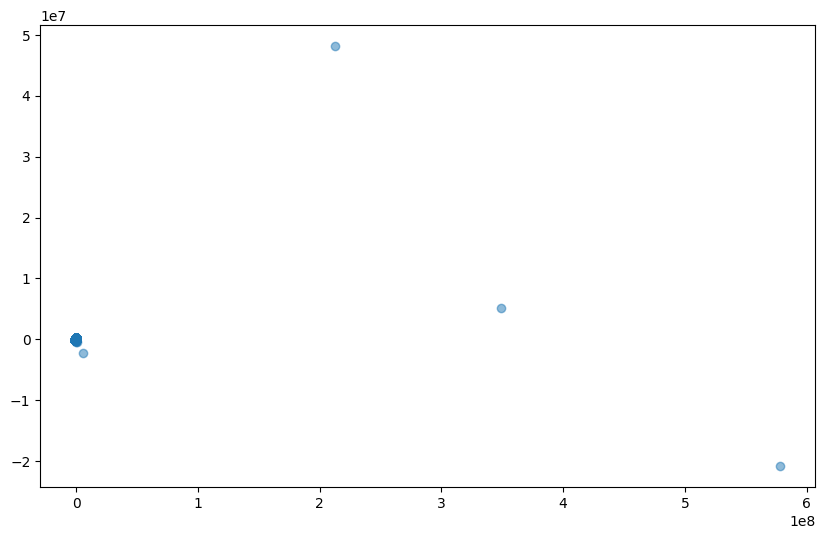

In [ ]:
#PLOT OF DATASET
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)
plt.figure(figsize=(10,6))
plt.scatter(df_pca[:,0], df_pca[:,1],alpha=0.5)
plt.show()

In [ ]:
print(df)

           Temp  D.O. (mg/l)   PH  CONDUCTIVITY (�mhos/cm)  B.O.D. (mg/l)  \
0     30.600000          6.7  7.5                    203.0       6.940049   
1     29.800000          5.7  7.2                    189.0       2.000000   
2     29.500000          6.3  6.9                    179.0       1.700000   
3     29.700000          5.8  6.9                     64.0       3.800000   
4     29.500000          5.8  7.3                     83.0       1.900000   
...         ...          ...  ...                      ...            ...   
1986  26.209814          7.9  7.2                    738.0       2.700000   
1987  29.000000          7.5  6.3                    585.0       2.600000   
1988  28.000000          7.6  6.2                     98.0       1.200000   
1989  28.000000          7.7  6.5                     91.0       1.300000   
1990  29.000000          7.6  5.7                    110.0       1.100000   

      NITRATENAN N+ NITRITENANN (mg/l)  FECAL COLIFORM (MPN/100ml)  \
0    

In [ ]:
df.at[1,'PH']

0.006711335356344632

In [ ]:
#FEATURE SCALING
scaler = StandardScaler()
data = scaler.fit_transform(data)
col=['Temp','D.O. (mg/l)','PH', 'CONDUCTIVITY (�mhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)']
df = pd.DataFrame(data, columns=col)

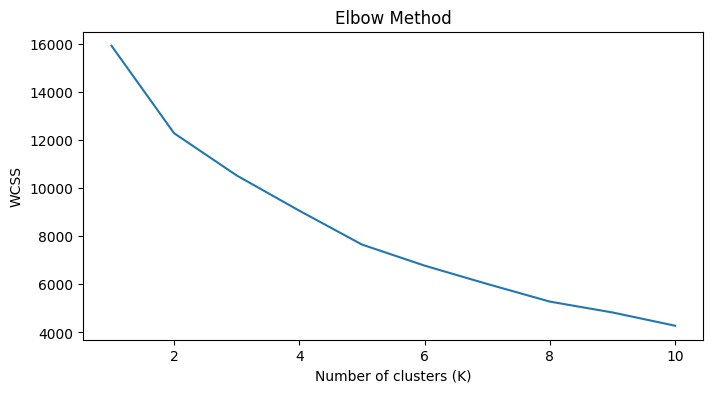

In [ ]:
#ELBOW METHOD FOR K IN KMEANS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#KMEANS CLUSTERING
k=5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_list = kmeans.fit_predict(df)
c=[0]*3
for i in cluster_list:
  if i==0:
    c[0]+=1
  if i==1:
    c[1]+=1
  else:
    c[2]+=1

print(c)

[401, 1470, 521]


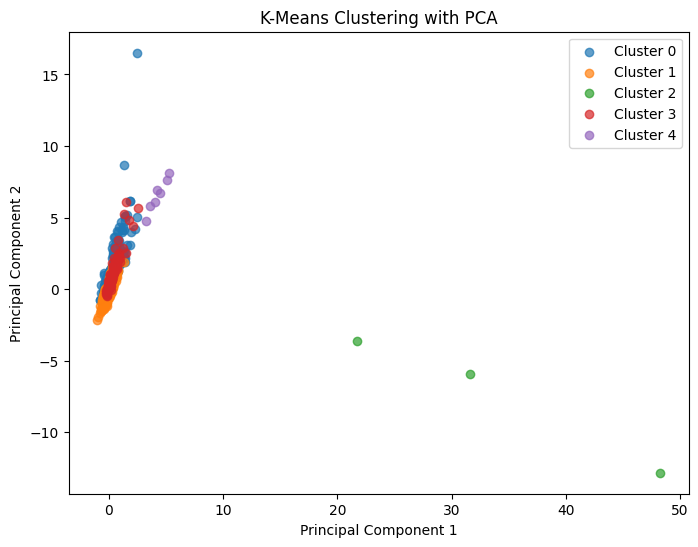

In [ ]:
#PLOT OF CLUSTERS
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    plt.scatter(data_pca[cluster_list == cluster_label][:, 0],
                data_pca[cluster_list == cluster_label][:, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend(loc='best')
plt.show()

In [ ]:
#ASSIGNING DATA POINTS TO CLUSTER
def assign_cluster(data_point, centers):
    dist=[np.linalg.norm(data_point - center) for center in centers]
    nearest = np.argmin(dist)
    return nearest
cc = kmeans.cluster_centers_
data_point=[-0.581051,-4.154220,0.579554,0.025326,3.355649,-0.187748,33.864163,37.129712]
nearest_cluster_index = assign_cluster(data_point, cc)
print(f"Data point is assigned to cluster {nearest_cluster_index}")

Data point is assigned to cluster 2


In [ ]:
#KMEANS ACCURACY
silhouette_avg = silhouette_score(df, cluster_list)
print(silhouette_avg)
db_index = davies_bouldin_score(df, cluster_list)
print(f"Davies-Bouldin Index: {db_index}")

0.3898313594704694
Davies-Bouldin Index: 0.985168532845611


In [ ]:
ind = [[] for _ in range(5)]
for i in range(len(cluster_list)):
    ind[cluster_list[i]].append(i)
cluster_dataframes = []
for cluster_indices in ind:
    cluster_df = df2.iloc[cluster_indices].copy()
    cluster_dataframes.append(cluster_df)
for i, cluster_df in enumerate(cluster_dataframes):
    print(f"Cluster {i}:")
    print(cluster_df.describe())
    print("\n\n")

Cluster 0:
             Temp  D.O. (mg/l)          PH  CONDUCTIVITY (�mhos/cm)  \
count  401.000000   401.000000  401.000000               401.000000   
mean    21.387861     5.581073    7.140684               728.098517   
std      3.168134     1.806924    0.878902              1200.258831   
min     10.000000     0.000000    0.000000                38.000000   
25%     19.000000     4.800000    7.000000               158.000000   
50%     21.000000     5.800000    7.200000               425.000000   
75%     23.000000     6.900000    7.500000               912.000000   
max     31.000000    10.000000    9.010000             13848.000000   

       B.O.D. (mg/l)  NITRATENAN N+ NITRITENANN (mg/l)  \
count     401.000000                        401.000000   
mean       12.824135                          4.468834   
std        22.241713                          7.348085   
min         0.400000                          0.000000   
25%         1.900000                          1.623079   
5

In [ ]:
#GETTING EPS VALUE FOR DBSCAN
features = df[['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (�mhos/cm)', 'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)']]
nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean')
nbrs.fit(features)
distances, indices = nbrs.kneighbors(features)
average_distance = np.mean(distances[:, -1])
print(average_distance)

0.5751429873152644


In [ ]:
best_score = -1
best_params = None
n_iter = 10
eps_range = np.linspace(0.1, 2.0, n_iter)
min_samples_range = np.arange(1, 20)
for _ in range(n_iter):
    eps = np.random.choice(eps_range)
    min_samples = np.random.choice(min_samples_range)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    clusters = dbscan.fit_predict(df)

    score = silhouette_score(df, clusters)


    if score > best_score:
        best_score = score
        best_params = {'eps': eps, 'min_samples': min_samples}

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)


Best parameters: {'eps': 1.3666666666666667, 'min_samples': 12}
Best silhouette score: 0.6405616618456382


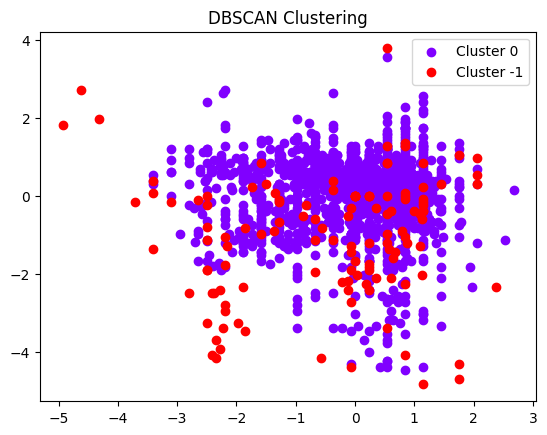

Cluster -1: 126 points
Cluster 0: 1865 points


In [ ]:
#DBSCAN
#FOR DIFFERENT PLOT CHANGE eps and min_samples
eps = 0.5751429873152644
min_samples = 5
dbscan_cluster = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
cluster_labels = dbscan_cluster.fit_predict(df)
unique_labels = set(cluster_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    mask = (cluster_labels == label)
    plt.scatter(df.values[mask, 0], df.values[mask, 1], c=[color], label=f'Cluster {label}')
plt.legend()
plt.title("DBSCAN Clustering")
plt.show()
unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")


In [ ]:
#ACCURACY
silhouette_avg = silhouette_score(df, cluster_labels)
print(silhouette_avg)
db_index = davies_bouldin_score(df, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

0.6405616618456382
Davies-Bouldin Index: 2.2325996184894077


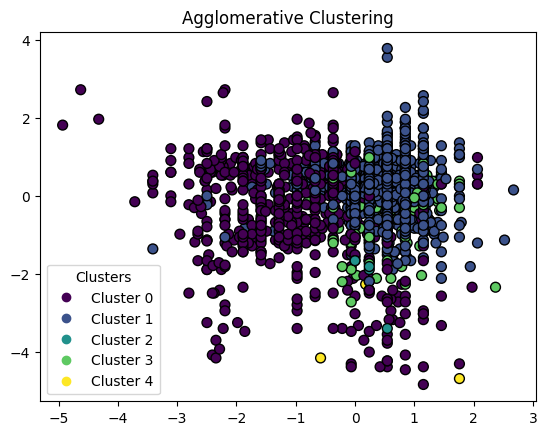

[619, 1228, 7, 134, 3]


In [ ]:
#AGGLOMERATIVE CLUSTERING
X = df.values
k = 5
agc = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_assignments = agc.fit_predict(X)
scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_assignments, cmap='viridis', s=50, edgecolors='k')
plt.title('Agglomerative Clustering')
legend_labels = [f'Cluster {i}' for i in range(k)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')
plt.show()
c=[0]*5
for i in cluster_assignments:
  if i==0:
    c[0]+=1
  elif i==1:
    c[1]+=1
  elif i==2:
    c[2]+=1
  elif i==3:
    c[3]+=1
  elif i==4:
    c[4]+=1

print(c)

In [ ]:
#ACCURACY
sil_score = silhouette_score(X, cluster_assignments)
print(f"Silhouette Score: {sil_score}")
db_index = davies_bouldin_score(X, cluster_assignments)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.27326945847312917
Davies-Bouldin Index: 1.1333068138542797


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming you have a DataFrame named 'df' with appropriate columns
# Replace 'df' with your actual DataFrame name

# Define the features you want to cluster on
features = ['feature1', 'feature2', 'feature3']
X = df[col]

# Initialize variables to store the best parameters and silhouette score
best_n_clusters = 0
best_linkage = ''
best_silhouette_score = -1

# Define the range of parameters to try
linkage_options = ['ward', 'complete', 'average', 'single']
n_clusters_options = range(2, 11)  # Assuming you want to try clusters from 2 to 10

for linkage in linkage_options:
    for n_clusters in n_clusters_options:
        # Fit Agglomerative Clustering
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        clusters = model.fit_predict(X)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, clusters)

        # Check if the current combination is better than the previous best
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_n_clusters = n_clusters
            best_linkage = linkage

# Print the best parameters
print("Best Parameters - n_clusters:", best_n_clusters, "linkage:", best_linkage)

Best Parameters - n_clusters: 2 linkage: ward


In [ ]:
ind = [[] for _ in range(5)]
for i in range(len(cluster_list)):
    ind[cluster_assignments[i]].append(i)
cluster_dataframes = []
for cluster_indices in ind:
    cluster_df = df2.iloc[cluster_indices].copy()
    cluster_dataframes.append(cluster_df)
for i, cluster_df in enumerate(cluster_dataframes):
    print(f"Cluster {i}:")
    print(cluster_df.describe())
    print("\n\n")

Cluster 0:
             Temp  D.O. (mg/l)          PH  CONDUCTIVITY (�mhos/cm)  \
count  619.000000   619.000000  619.000000               619.000000   
mean    23.025258     5.872859    7.343154               772.781885   
std      3.510405     1.832081    0.417383              1934.537148   
min     10.000000     0.000000    5.800000                27.000000   
25%     20.600000     4.900000    7.100000               114.500000   
50%     23.000000     6.300000    7.300000               307.000000   
75%     25.300000     7.200000    7.600000               818.500000   
max     33.000000    10.000000    9.010000             24506.000000   

       B.O.D. (mg/l)  NITRATENAN N+ NITRITENANN (mg/l)  \
count     619.000000                        619.000000   
mean       10.221958                          3.412653   
std        20.946958                          6.308684   
min         0.100000                          0.000000   
25%         1.600000                          0.700000   
5